CPU times: user 3.01 ms, sys: 460 µs, total: 3.47 ms
Wall time: 3.13 ms
CPU times: user 1.65 ms, sys: 497 µs, total: 2.15 ms
Wall time: 1.69 ms


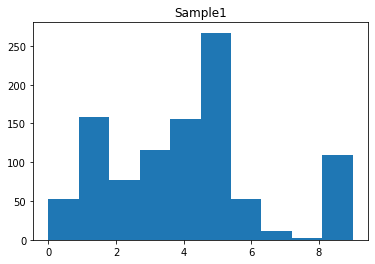

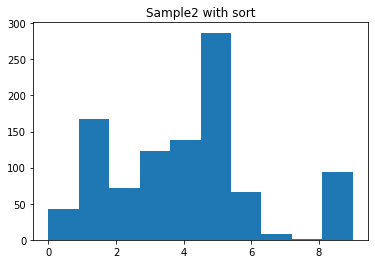

In [95]:
#task1: generate a sample from 0...9 with weights 
#0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2

import numpy as np
import matplotlib.pyplot as plt
import time

from operator import itemgetter
%matplotlib inline
N=1000

def generate_from0_to9(weights,N):
    mas_of_randoms=np.random.random(N)
    otv=np.zeros(N)
    for i in range(N):
        s=mas_of_weights[0]
        j=0
        while(s<mas_of_randoms[i]):
            s=s+mas_of_weights[j+1]
            j=j+1
        otv[i]=j
    return otv

def generate_from0_to9_with_sort(weights,N):
    
    dict_of_data={mas_of_weights[i]:i for i in range(10)}
    list_keys = list(dict_of_data.keys())
    list_keys.sort(reverse=True)
    new_chisla=np.zeros(10)
    for i in range(len(list_keys)):
        new_chisla[i]=dict_of_data[list_keys[i]]

    mas_of_randoms=np.random.random(N)
    otv=np.zeros(N)
    for i in range(N):
        s=list_keys[0]
        j=0
        while(s<mas_of_randoms[i]):
            s=s+list_keys[j+1]
            j=j+1
        otv[i]=new_chisla[j]
    return otv
    

 

    
mas_of_weights=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
mas_of_weights=mas_of_weights/mas_of_weights.sum()

%time data1=generate_from0_to9(mas_of_weights,N)
%time data2=generate_from0_to9_with_sort(mas_of_weights,N)

plt.hist(data1)
plt.title("Sample1")
plt.show()

plt.hist(data2)
plt.title("Sample2 with sort")
plt.show()





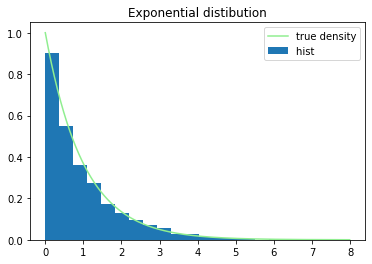

In [116]:
#task2: build a sample from Exp(lamda)
#distribution function F: y=1-exp{-lamda*x}
#F^(-1): x=-ln(1-y)/lamda

import numpy as np
import matplotlib.pyplot as plt
lamda=1
N=1000 #amount of sample
K=300 #amount of borders
Left_border=0
Right_border=8


mas_of_randoms = [np.random.rand() for i in range(N)]
observed_distribution=np.zeros(N)
for i in range(0,N):
    observed_distribution[i]=np.log(1-mas_of_randoms[i])/(-lamda)
    

true_density=np.zeros(N)
tmp=np.arange(0,8,0.01)
true_density=lamda*np.exp(-lamda*tmp)


plt.plot(tmp,true_density,label='true density',color='lightgreen')
plt.hist(observed_distribution,density=True,bins=20,label="hist ")
plt.title("Exponential distibution")
plt.legend()
plt.show()





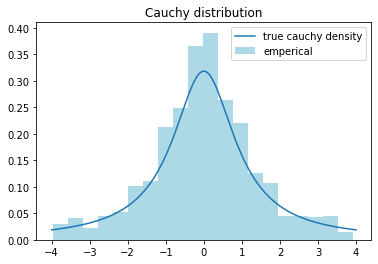

In [146]:
#task3: cauchy distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
cauchy_distrib = stats.cauchy()
N=1000
C=4
def h_density(x):
    return 1/8

def f_density(x):
    return cauchy_distrib.pdf(x)
plotnost_x = np.linspace(-4, 4, N) 
plotnost_y=np.zeros(N)
for i in range(N):
    plotnost_y[i]=cauchy_distrib.pdf(plotnost_x[i])
    

fitting_x=np.zeros(N)
step=0
while(step<N):
    z=8*np.random.rand()-4 #uniform on [-4,4]
    u=np.random.rand()
    if (u<=f_density(z)/(C*h_density(z))):
        fitting_x[step]=z
        step=step+1
   
    
plt.hist(fitting_x,density=True,bins=20,label="emperical",color='lightblue')
plt.plot(plotnost_x,plotnost_y,label="true cauchy density")
plt.title("Cauchy distribution")
plt.legend()
plt.show()




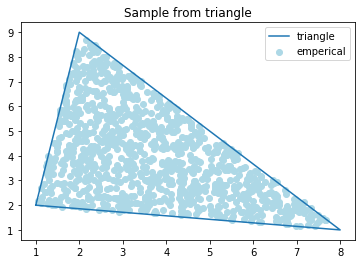

In [7]:
#task4: sample from triangle
import numpy as np
import matplotlib.pyplot as plt
import math

triangle_x=[1,2,8,1]
triangle_y=[2,9,1,2]
N=1000

xrand = np.zeros(N)
yrand =np.zeros(N)
step=0

while(step<N):
    x=np.random.rand()
    y=np.random.rand()
    if y<=1-x:
        xrand[step]=x*5*np.sqrt(2)
        yrand[step]=y*5*np.sqrt(2)
        step=step+1
        
phi=np.arctan(-1/7)
mas_of_x=xrand*math.cos(phi)-yrand*math.sin(phi)+1  
mas_of_y=xrand*math.sin(phi)+yrand*math.cos(phi)+2
        
plt.scatter(mas_of_x,mas_of_y,label="emperical",color='lightblue')
plt.plot(triangle_x,triangle_y,label="triangle")
plt.title("Sample from triangle")
plt.legend()
plt.show()


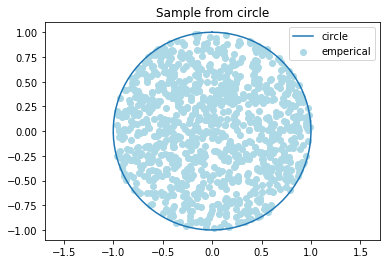

In [11]:
#task5: sample from a circle
import numpy as np
from matplotlib.patches import Circle
import math
N=1000
 
t = np.linspace(0, 2 * np.pi, 100)
    
mas_of_phi=[2*np.pi*np.random.rand() for i in range(N)]
mas_of_r=[np.sqrt(np.random.rand()) for i in range(N)]

mas_of_x=np.zeros(N)
mas_of_y=np.zeros(N)
for i in range(N):
    mas_of_x[i]=mas_of_r[i]*math.cos(mas_of_phi[i])
    mas_of_y[i]=mas_of_r[i]*math.sin(mas_of_phi[i])
    
plt.scatter(mas_of_x,mas_of_y,label="emperical",color='lightblue')
plt.plot(np.sin(t), np.cos(t),label='circle')
plt.axis('equal')
plt.title("Sample from circle")
plt.legend()
plt.show()



a_walk: [-1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1.]
b_walk: [ 1.  1. -1. -1. -1.  1. -1.  1.  1.  1. -1.  1.  1.  1. -1.]
x_walk: [ 0. -1. -1.  0.  1.  1.  0.  1. -1.  0. -1.  0. -1. -1.  0.]
y_walk: [ 0.  0.  0. -1.  0.  0.  1.  0.  0.  1.  0. -1.  0.  0.  1.]
mas_of_x: [ 0. -1. -2. -2. -1.  0.  0.  1.  0.  0. -1. -1. -2. -3. -3.]
mas_of_y: [ 0.  0.  0. -1. -1. -1.  0.  0.  0.  1.  1.  0.  0.  0.  1.]


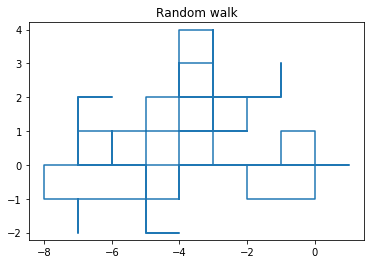

In [43]:
#task6: random walk
import numpy as np
from matplotlib.patches import Circle
import math

N=100

def give_step(left_plus,left_minus):
    tmp=np.random.rand()
    if (tmp>=0.5):
        if(left_plus>0): 
            return 1
        elif (left_plus==0): 
            return -1
    elif (tmp<0.5): 
        if (left_minus>0):
            return -1
        elif (left_minus==0): return 1
    

def generate_one_axis_walk():
    mas_of_signs=np.zeros(N)
    left_plus=N//2
    left_minus=N//2
    for i in range(N):
        mas_of_signs[i]=give_step(left_plus,left_minus)
        if (mas_of_signs[i]==1):
            left_plus=left_plus-1
        else:
            left_minus=left_minus-1
            
            
    return mas_of_signs
            
a_walk=generate_one_axis_walk()
b_walk=generate_one_axis_walk()
print("a_walk:",a_walk[0:15])
print("b_walk:",b_walk[0:15])


x_walk=np.zeros(N+1)
y_walk=np.zeros(N+1)
x_walk[0]=0
y_walk[0]=0
for i in range(0,N):
    if(a_walk[i]==1 and b_walk[i]==1):
        x_walk[i+1]=0
        y_walk[i+1]=1
    if(a_walk[i]==-1 and b_walk[i]==1):
        x_walk[i+1]=-1
        y_walk[i+1]=0
    if(a_walk[i]==-1 and b_walk[i]==-1):
        x_walk[i+1]=0
        y_walk[i+1]=-1
    if(a_walk[i]==1 and b_walk[i]==-1):
        x_walk[i+1]=1
        y_walk[i+1]=0
        

print("x_walk:",x_walk[0:15])
print("y_walk:",y_walk[0:15])

mas_of_x=np.zeros(N+1)
mas_of_y=np.zeros(N+1)
mas_of_x[0]=0
mas_of_y[0]=0
for i in range(1,N):
    mas_of_x[i]=mas_of_x[i-1]+x_walk[i]
    mas_of_y[i]=mas_of_y[i-1]+y_walk[i]
    
print("mas_of_x:",mas_of_x[0:15])
print("mas_of_y:",mas_of_y[0:15])
            
plt.plot(mas_of_x,mas_of_y)
#plt.plot(x_walk,y_walk)
plt.axis('equal')
plt.title("Random walk")
#plt.xlim(-N//2,N//2)
#plt.ylim(-N//2,N//2)
plt.show()
        




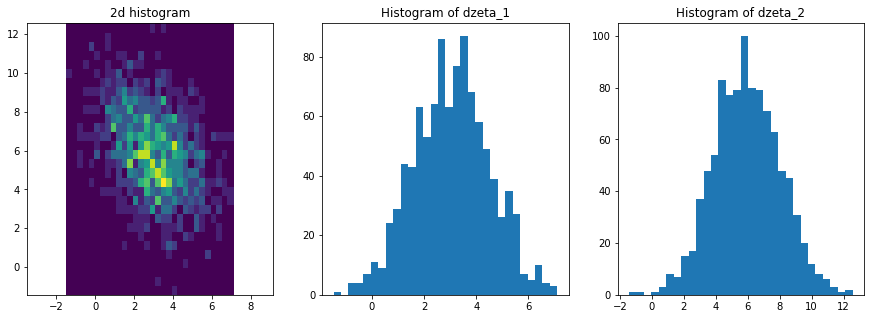

In [44]:
#Box-Muller number2
import numpy as np
import matplotlib.pyplot as plt

N=1000
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

def give_indep_stand_norm():
    x=-1+2*rng()
    y=-1+2*rng()
    while((x*x + y*y >1) or (x*x + y*y ==0)):
        x=-1+2*rng()
        y=-1+2*rng()
    
    s= x*x + y*y
    a = x*np.sqrt(-2 * np.log(s)/s) 
    b = y*np.sqrt(-2 * np.log(s)/s) 
    return a,b

def matrix_mult_matrix(A,B):
    T=np.zeros(4) 
    T=T.reshape((2,2))
    for i in range(2):
        for j in range(2):
            s=0
            for k in range(2):
                s=s+A[i][k]*B[k][j]
            T[i][j]=s
    return T

def matrix_mult_vector(A,X):
    T=np.zeros(2) 
    T=T.reshape((2,1))
    for i in range(2):
        s=0
        for k in range(2):
            s=s+A[i][k]*X[k]
        T[i]=s
    return T

            


J=np.zeros(4) 
J=J.reshape((2,2))
J[0][0]=3+np.sqrt(2)
J[1][1]=3-np.sqrt(2)

C=np.zeros(4) 
C=C.reshape((2,2))
C[0][0]=(-1+np.sqrt(2))/(np.sqrt(4-2*np.sqrt(2)))
C[0][1]=(-1-np.sqrt(2))/(np.sqrt(4+2*np.sqrt(2)))
C[1][0]=1/(np.sqrt(4-2*np.sqrt(2)))
C[1][1]=1/(np.sqrt(4+2*np.sqrt(2)))


C_inv=np.linalg.inv(C)

mean36=np.zeros(2).reshape((2,1))
mean36[0]=3
mean36[1]=6
mean=matrix_mult_vector(C,mean36)


ksi_1=np.zeros(N)
ksi_2=np.zeros(N)
for i in range(N):
    a,b=give_indep_stand_norm()
    ksi_1[i]=a
    ksi_2[i]=b

ksi_1=ksi_1*np.sqrt(3+np.sqrt(2))
ksi_2=ksi_2*np.sqrt(3-np.sqrt(2))


eta_1=np.zeros(N)
eta_2=np.zeros(N)
for i in range(N):
    eta_1[i]=C_inv[0][0]*ksi_1[i]+C_inv[0][1]*ksi_2[i]
    eta_2[i]=C_inv[1][0]*ksi_1[i]+C_inv[1][1]*ksi_2[i]

dzeta_1=np.zeros(N)
dzeta_2=np.zeros(N)
dzeta_1=3+eta_1
dzeta_2=6+eta_2


fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(dzeta_1, dzeta_2, bins=30)
ax[0].axis('equal')
ax[0].set_title("2d histogram")
ax[1].hist(dzeta_1, bins=30)
ax[1].set_title("Histogram of dzeta_1")
ax[2].hist(dzeta_2, bins=30)
ax[2].set_title("Histogram of dzeta_2")

plt.show()





mean amount of colors= 28.784


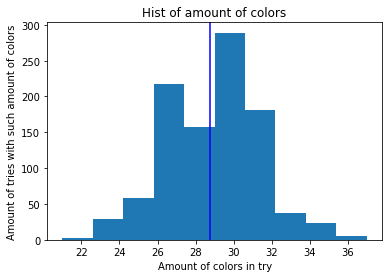

In [45]:
#task8: Partitions of a set
import numpy as np
import matplotlib.pyplot as plt
import math
N=100
tries=1000

def give_Bell_numbers(N):
    mas=np.zeros(N+1)
    mas[0]=1
    for n in range(1,N+1):
        s=0
        for k in range (0,n):
            s=s+mas[k]* math.factorial(n-1)/( math.factorial(k)* math.factorial(n-1-k))
        mas[n]=s
    return mas
def find_amount_of_colors(mas_of_weights,mas_of_values):
    K=np.random.choice(mas_of_values, None, True, mas_of_weights[1:]) 
    mas_of_col=np.zeros(N)
    for i in range(N):
        mas_of_col[i]=int(1+K*rng())
    return len(np.unique(mas_of_col))
    

Bell_numbers=np.zeros(N+1)
Bell_numbers= give_Bell_numbers(N)
#print(Bell_numbers)

mas_of_weights=np.zeros(N+1)
s=0
for k in range(1,N+1):
    mas_of_weights[k]=math.pow(k,N)/((math.e)*(math.factorial(k))*(Bell_numbers[N]))
    s=s+mas_of_weights[k]
mas_of_weights=mas_of_weights/s
mas_of_values=1+np.arange(N)

mas_of_tries=np.zeros(tries)
for i in range(tries):
    mas_of_tries[i]=find_amount_of_colors(mas_of_weights,mas_of_values)

print("mean amount of colors=",mas_of_tries.mean())
plt.hist(mas_of_tries)
plt.axvline(mas_of_tries.mean(),c='b')
plt.title("Hist of amount of colors")
plt.xlabel("Amount of colors in try")
plt.ylabel("Amount of tries with such amount of colors")
plt.show()